In [81]:
from statistics import median
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import torch
import json
from collections import Counter, defaultdict
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('downloads/colbertv2.0')

chunk_idx = -1
codes = []

code2tok = defaultdict(Counter)
tok2code = defaultdict(Counter)

with open('ids.jsonl') as fin:
  id_it = iter(fin)
  next(id_it) # skip the first line -- it comes from the clustering step and doesn't correspond with the values in the codes.pt files
  for ids in id_it:
    ids = json.loads(ids)
    if len(codes) == 0:
      chunk_idx += 1
      print(f'chunk {chunk_idx}')
      codes = torch.load(f'experiments/notebook/indexes/2bits/{chunk_idx}.codes.pt').cpu().tolist()
    for id, code in zip(ids, codes):
      code2tok[code][id] += 1
      tok2code[id][code] += 1
    codes = codes[len(ids):]
code2count = Counter({k: len(v) for k, v in code2tok.items()})
code2total = Counter({k: sum(v.values()) for k, v in code2tok.items()})
code2toppct = Counter({k: v.most_common(1)[0][1] / code2total[k] for k, v in code2tok.items()})
tok2count = Counter({k: len(v) for k, v in tok2code.items()})
tok2total = Counter({k: sum(v.values()) for k, v in tok2code.items()})
tok2toppct = Counter({k: v.most_common(1)[0][1] / tok2total[k] for k, v in tok2code.items()})

chunk 0
chunk 1
chunk 2
chunk 3
chunk 4
chunk 5
chunk 6
chunk 7
chunk 8
chunk 9
chunk 10
chunk 11
chunk 12
chunk 13
chunk 14
chunk 15
chunk 16
chunk 17
chunk 18
chunk 19
chunk 20
chunk 21
chunk 22
chunk 23
chunk 24
chunk 25
chunk 26
chunk 27
chunk 28
chunk 29
chunk 30
chunk 31
chunk 32
chunk 33
chunk 34
chunk 35
chunk 36
chunk 37
chunk 38
chunk 39
chunk 40
chunk 41
chunk 42
chunk 43
chunk 44
chunk 45
chunk 46
chunk 47
chunk 48
chunk 49
chunk 50
chunk 51
chunk 52
chunk 53
chunk 54
chunk 55
chunk 56
chunk 57
chunk 58
chunk 59
chunk 60
chunk 61
chunk 62
chunk 63
chunk 64
chunk 65
chunk 66
chunk 67
chunk 68
chunk 69
chunk 70
chunk 71
chunk 72
chunk 73
chunk 74
chunk 75
chunk 76
chunk 77
chunk 78
chunk 79
chunk 80
chunk 81
chunk 82
chunk 83
chunk 84
chunk 85
chunk 86
chunk 87
chunk 88
chunk 89
chunk 90
chunk 91
chunk 92
chunk 93
chunk 94
chunk 95
chunk 96
chunk 97
chunk 98
chunk 99
chunk 100
chunk 101
chunk 102
chunk 103
chunk 104
chunk 105
chunk 106
chunk 107
chunk 108
chunk 109
chunk 110


In [77]:
clstoks = {1, 2, 101, 102} # [q] [d] [cls] [sep]
code2count_nocls = Counter({k: len([x for x in v if x not in clstoks]) for k, v in code2tok.items()})
code2total_nocls = Counter({k: sum([y for x, y in v.items() if x not in clstoks]) for k, v in code2tok.items()})
code2toppct_nocls = Counter({k: Counter({x: y for x, y in v.items() if x not in clstoks}).most_common(1)[0][1] / code2total_nocls[k] for k, v in code2tok.items() if code2total_nocls[k] > 0})
tok2count_nocls = Counter({k: len(v) for k, v in tok2code.items() if k not in clstoks})
tok2total_nocls = Counter({k: sum(v.values()) for k, v in tok2code.items() if k not in clstoks})
tok2toppct_nocls = Counter({k: v.most_common(1)[0][1] / tok2total_nocls[k] for k, v in tok2code.items() if k not in clstoks})


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

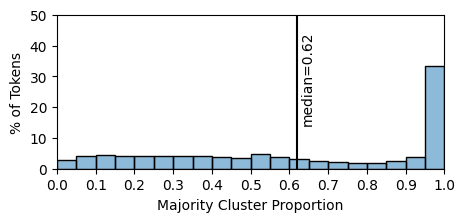

In [83]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(tok2toppct.values(), bins=20, legend=False, ax=ax, stat='percent')
ax.set_ylabel('% of Tokens')
ax.set_xlabel('Majority Cluster Proportion')
ax.set_xlim(0, 1)
ax.set_xticks([x/10 for x in range(11)])
ax.set_ylim(0, 50)
m = median(tok2toppct.values())
ax.axvline(m, c='k')
ax.text(m+0.01, 15, f'median={m:.2f}', rotation='vertical')
plt.savefig('tok2toppct.pdf', bbox_inches='tight')

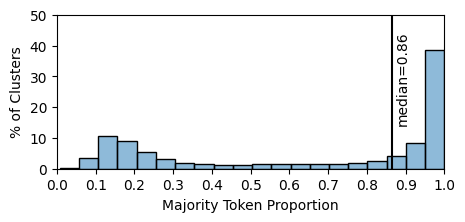

In [85]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(code2toppct.values(), bins=20, legend=False, ax=ax, stat='percent')
ax.set_ylabel('% of Clusters')
ax.set_xlabel('Majority Token Proportion')
ax.set_xlim(0, 1)
ax.set_xticks([x/10 for x in range(11)])
ax.set_ylim(0, 50)
m = median(code2toppct.values())
ax.axvline(m, c='k')
ax.text(m+0.01, 15, f'median={m:.2f}', rotation='vertical')
plt.savefig('code2toppct.pdf', bbox_inches='tight')

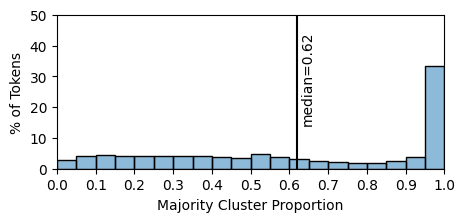

In [82]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(tok2toppct_nocls.values(), bins=20, legend=False, ax=ax, stat='percent')
ax.set_ylabel('% of Tokens')
ax.set_xlabel('Majority Cluster Proportion')
ax.set_xlim(0, 1)
ax.set_xticks([x/10 for x in range(11)])
ax.set_ylim(0, 50)
m = median(tok2toppct_nocls.values())
ax.axvline(m, c='k')
ax.text(m+0.01, 15, f'median={m:.2f}', rotation='vertical')
plt.savefig('tok2toppct_nocls.pdf', bbox_inches='tight')

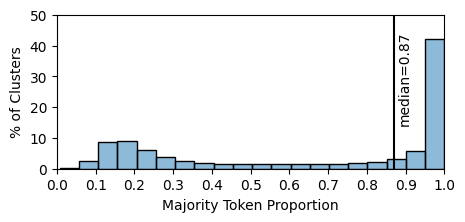

In [84]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(code2toppct_nocls.values(), bins=20, legend=False, ax=ax, stat='percent')
ax.set_ylabel('% of Clusters')
ax.set_xlabel('Majority Token Proportion')
ax.set_xlim(0, 1)
ax.set_xticks([x/10 for x in range(11)])
ax.set_ylim(0, 50)
m = median(code2toppct_nocls.values())
ax.axvline(m, c='k')
ax.text(m+0.01, 15, f'median={m:.2f}', rotation='vertical')
plt.savefig('code2toppct_nocls.pdf', bbox_inches='tight')

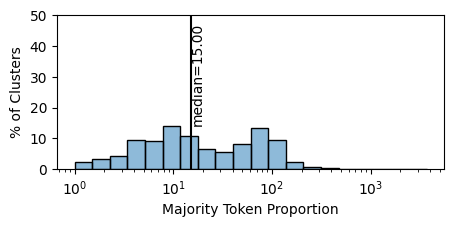

In [90]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(code2count.values(), bins=20, legend=False, ax=ax, stat='percent', log_scale=True)
ax.set_ylabel('% of Clusters')
ax.set_xlabel('Majority Token Proportion')
# ax.set_xlim(0, 1)
# ax.set_xticks([x/10 for x in range(11)])
ax.set_ylim(0, 50)
# ax.set_xscale('log')
m = median(code2count.values())
ax.axvline(m, c='k')
ax.text(m+0.01, 15, f'median={m:.2f}', rotation='vertical')
plt.savefig('code2tocount.pdf', bbox_inches='tight')

In [91]:
sum(1 for x, y in code2count.items() if y == 1) / len(code2count)

0.0220184326171875

In [95]:
sum(1 for x, y in code2toppct.items() if y > 0.95) / len(code2toppct)

0.387420654296875

In [96]:
sum(1 for x, y in tok2toppct.items() if y > 0.95) / len(tok2toppct)

0.33312618677714484

/home/sean/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


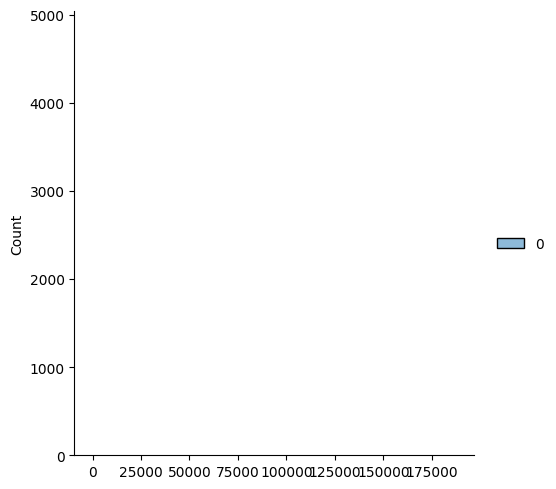

In [13]:
sns.displot(tok2count.values())

In [12]:
code2toppct[87188]

0.8317135549872122

In [38]:
for x in [87188,21395,48169,130592,225987,30151,227745,239463,61746,79630,36303,130782,233759,111726,190343,162309,214740,200911,]:
    print(f'Cluster {x} (size={code2total[x]})')
    for k, v in code2tok[x].most_common(5):
        print(f' {v/code2total[x]*100:.1f}% {tokenizer.decode(k)}')
    if code2count[x] > 5:
        value = sum(x/code2total[x] for _, x in code2tok[x].most_common()[5:])
        print(f' {value*100:.1f}% [{code2count[x]-5} more]')

Cluster 87188 (size=1955)
 83.2% [CLS]
 16.4% [SEP]
 0.2% and
 0.2% but
 0.1% the
Cluster 21395 (size=2874)
 93.7% gold
 5.8% [unused1]
 0.2% “
 0.1% ”
 0.1% –
 0.1% [2 more]
Cluster 48169 (size=3194)
 84.4% grow
 10.9% grows
 2.7% growing
 1.0% grew
 0.6% grown
 0.8% [10 more]
Cluster 130592 (size=5742)
 99.1% ##fish
 0.3% ”
 0.3% ’
 0.2% –
 0.1% —
 0.2% [2 more]
Cluster 225987 (size=3184)
 64.0% [CLS]
 33.2% [SEP]
 0.8% the
 0.8% and
 0.3% but
 2.1% [14 more]
Cluster 30151 (size=1881)
 86.3% grow
 7.7% grows
 4.3% growing
 0.6% to
 0.3% grown
 1.0% [8 more]
Cluster 227745 (size=3727)
 89.7% grow
 4.9% grows
 3.1% growing
 0.8% grew
 0.5% to
 1.9% [9 more]
Cluster 239463 (size=3613)
 91.4% gold
 5.2% [unused1]
 1.5% ’
 0.8% [CLS]
 0.4% “
 1.1% [10 more]
Cluster 61746 (size=3971)
 99.5% ##fish
 0.4% ’
 0.1% –
 0.0% fish
 0.0% ##es
 0.1% [2 more]
Cluster 79630 (size=3914)
 96.3% gold
 2.9% [unused1]
 0.3% ”
 0.3% ’
 0.1% “
 0.3% [4 more]
Cluster 36303 (size=2951)
 99.3% ##fish
 0.5% ’
 

In [54]:
import math
N = sum(code2total.values())
hc = -1 * sum(v / N * math.log(v/N, 10) for v in code2total.values())

In [59]:
hck = -1 * sum( sum( v/N * math.log(v/tok2total[t], 10) for t, v in vs.items() ) for k, vs in code2tok.items() )

In [62]:
1 - hck / hc

0.5156544309406106

In [74]:
tokenizer.decode(2)

'[unused1]'